 ### **Introducción al Manejo de imágenes con OpenCV en Python**





*   Para trabajar con OpenCV debemos importar el módulo cv2.
*   Para trabajar dentro del jupyter-notebook con imágenes, no podemos usar las funciones de pintado de OpenCV ([cv2.imshow(·)](https://docs.opencv.org/4.6.0/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563) +  [cv2.waitKey(·)](https://docs.opencv.org/4.6.0/d7/dfc/group__highgui.html#ga5628525ad33f52eab17feebcfba38bd7) pensadas para mostrar resultados de manera interactiva (usando el ratón). Por eso vamos a usar matplotlib.pyplot que funciona en los notebooks.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__) # Imprimimos la versión de OpenCV

ModuleNotFoundError: No module named 'cv2'

<class 'numpy.ndarray'>
(316, 474, 3)


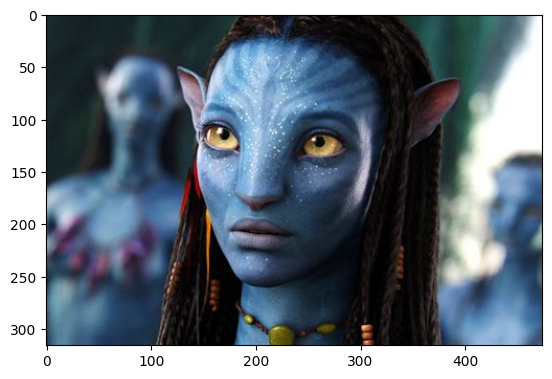

In [ ]:
I = cv2.imread("./src/azul.jpeg") # , 0) si colocamos este parámetro la imagen se lee siempre en niveles de gris
# Hay que comprobar si la imagen se ha podido leer correctamente antes de operar con ella
if I is None:
  print("Hay error")

# ERROR típico 1: No comprobarlo y pasar la imagen I a otra parte del código, 
# cuando salta un error nos va a costar localizar que es un error en el path 
# donde estaban las imágenes y que no se puede leer ninguna de disco


print(type(I)) # imprimimos el tipo de la variable I (las imágenes en OpenCV son de la clase np.array)
print(I.shape) # dimensiones del np.array que representa la imagen (alto x anto x número canales color) para imágenes en color

Irgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB) # Las imágenes en OpenCV vienen siempre con los canales BGR en lugar de RGB
plt.imshow(Irgb) # matplotlib.plt asume siempre imágenes RGB (R=I[:,:,0], G=I[:,:,1], B=I[:,:,2])

# ERROR típico 2: No mostrar las imágenes con los colores correctos al usar
# matplotlib

(316, 474)


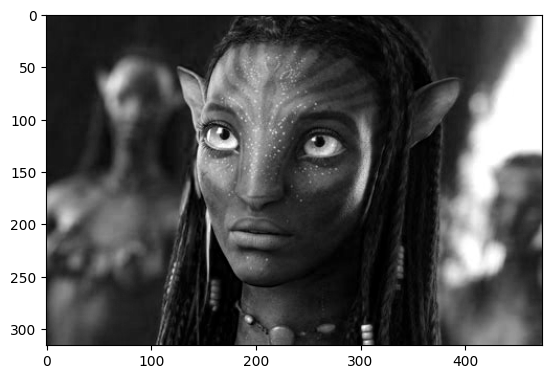

In [ ]:
R = I[:,:,2] # sacamos el canal R de  I (recordemos que es una imagen BGR)
print(R.shape)
plt.imshow(R, cmap="gray") # y lo pintamos como una imagen de grises

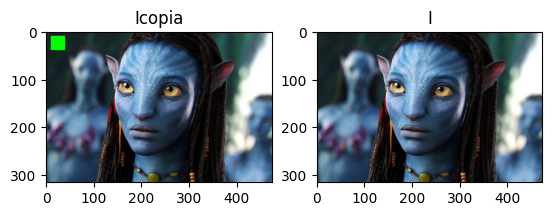

In [ ]:
# Colocamos un cuadrado verde en la imagen I entre las filas 10 y 39, columnas 10 y 39
Icopia = I.copy() # Cuando modificamos los píxeles de una imagen, muchas veces nos interesa hacerlo sobre una copia
Icopia[10:40, 10:40, 0] = 0 #B
Icopia[10:40, 10:40, 1] = 255 #G
Icopia[10:40, 10:40, 2] = 0 #R

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(Icopia, cv2.COLOR_BGR2RGB)) # visualizamos una imagen BGR en matplotlib.pyplot correctamente
plt.title('Icopia')
plt.subplot(1, 2, 2)
plt.title('I')
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB)) 

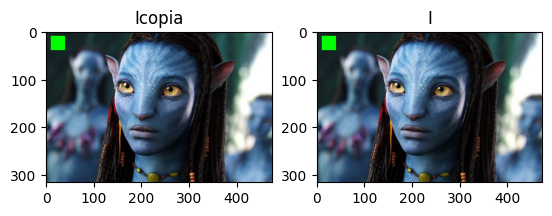

In [ ]:
# Colocamos un cuadrado verde en la imagen I entre las filas 10 y 39, columnas 10 y 39
Icopia = I # ¿Qué ocurre si no llamamos a I.copy() y asignamos únicamente la variable? 
# Los datos de la imagen están en memoria dinámica, así que modificar Icopia 
# supone modificar los datos de la imagen original 
# (Icopia = I únicamente copia la dirección del puntero a memoria dinámica)
Icopia[10:40, 10:40, 0] = 0 #B
Icopia[10:40, 10:40, 1] = 255 #G
Icopia[10:40, 10:40, 2] = 0 #R

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(Icopia, cv2.COLOR_BGR2RGB)) # visualizamos una imagen BGR en matplotlib.pyplot correctamente
plt.title('Icopia')
plt.subplot(1, 2, 2)
plt.title('I')
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB)) 

# ERROR típico 3: Modificar una imagen sin darnos cuenta a través de otra 
# variable que apunta a la misma memoria.

# Recuperamos I de disco dado que la hemos estropeado:
I = cv2.imread("./src/azul.jpeg")
if I is None:
  print("Hay error")


Text(0.5, 1.0, 'Icrop')

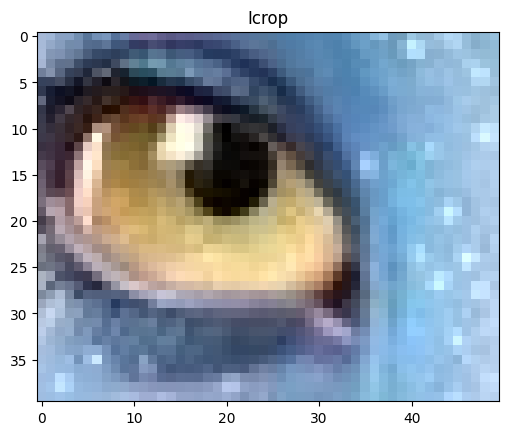

In [ ]:
# Hagamos ahora un recorte de la imagen original
Icrop = Icopia[100:140, 150:200, :]

plt.figure()
plt.imshow(cv2.cvtColor(Icrop, cv2.COLOR_BGR2RGB)) # visualizamos una imagen BGR en matplotlib.pyplot correctamente
plt.title('Icrop')

Indexado de un numpy array con arrays de booleanos (con una condición sobre los píxeles de otro array)

In [ ]:
# Creamos un np.array con una imagen pequeña formada por una lista de listas. 
# Cada fila va en una de las listas (ej. fila 0 es [1, 2, 3])
Ipeque = np.array([[1, 2, 3], 
                   [4, 5, 6], 
                   [7, 8, 9]])
print(Ipeque)

# Obtenemos una matriz de booleanos del mismo tamaño que Ipeque donde ahora
# tenemos True donde se cumple la condición y False en la entrada de la matriz
# que no lo cumple.
iguales_a_5 = (Ipeque == 5)
print(iguales_a_5)
print(iguales_a_5.dtype)

# Usamos la matriz de booleanos para "indexar" en el np.array únicamente los 
# elementos que están a True. Es decir, aquellos que cumplen la condición. 
# Una vez los tenemos indexados podemos asignarles un valor únicamente a ellos
# o realizar otras operaciones.
Ipeque[iguales_a_5] = -1
print(Ipeque)

# En este caso la matriz de booleanos con otra condicción se genera directamente 
# en el acceso a los elementos de Ipeque. ¡Es código muy legible e intuitivo! 
# Y lo que es más importante ¡evita los bucles sobre píxeles que son muy lentos 
# en imágenes grandes!
Ipeque[Ipeque==-1] = 50
print(Ipeque)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False False False]
 [False  True False]
 [False False False]]
bool
[[ 1  2  3]
 [ 4 -1  6]
 [ 7  8  9]]
[[ 1  2  3]
 [ 4 50  6]
 [ 7  8  9]]
